<a href="https://colab.research.google.com/github/Shahbaz894/meachine-learning-/blob/main/Eigen_decomposition_and_PCA_Varince_by_shahbaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Diagonal Matrix -
A diagonal matrix is a type of square matrix where the entries outside the main diagonal
are all zero; the main diagonal is from the top left to the bottom right of the square
matrix.
Powers: The nth power of a diagonal matrix (where n is a non-negative integer) can
be obtained by raising each diagonal element to the power of n.
a.
Eigenvalues: The eigenvalues of a diagonal matrix are just the values on the diagonal.
The corresponding eigenvectors are the standard basis vectors.
b.
Multiplication by a Vector: When a diagonal matrix multiplies a vector, it scales each
component of the vector by the corresponding element on the diagonal.
c.
Matrix Multiplication: The product of two diagonal matrices is just the diagonal
matrix with the corresponding elements on the diagonals multiplied.
d.
2. Orthogonal Matrix
An orthogonal matrix is a square matrix whose columns and rows are orthogonal unit
vectors (i.e., orthonormal vectors), meaning that they are all of unit length and are at(90)
right angles to each other.
Perfect rotation, no scaling or shearing.
Inverse Equals Transpose: The transpose of an orthogonal matrix equals its inverse,
i.e., A^T = A^(-1). This property makes calculations with orthogonal matrices
computationally efficient.
a.

3. Symmetric Matrix
A symmetric matrix is a type of square matrix that is equal to its own transpose. In other
words, if you swap its rows with columns, you get the same matrix.
Real Eigenvalues: The eigenvalues of a real symmetric matrix are always real, not
complex.
a.
Orthogonal Eigenvectors: For a real symmetric matrix, the eigenvectors
corresponding to different eigenvalues are always orthogonal to each other. If the
eigenvalues are distinct, you can even choose an orthonormal basis of eigenvectors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

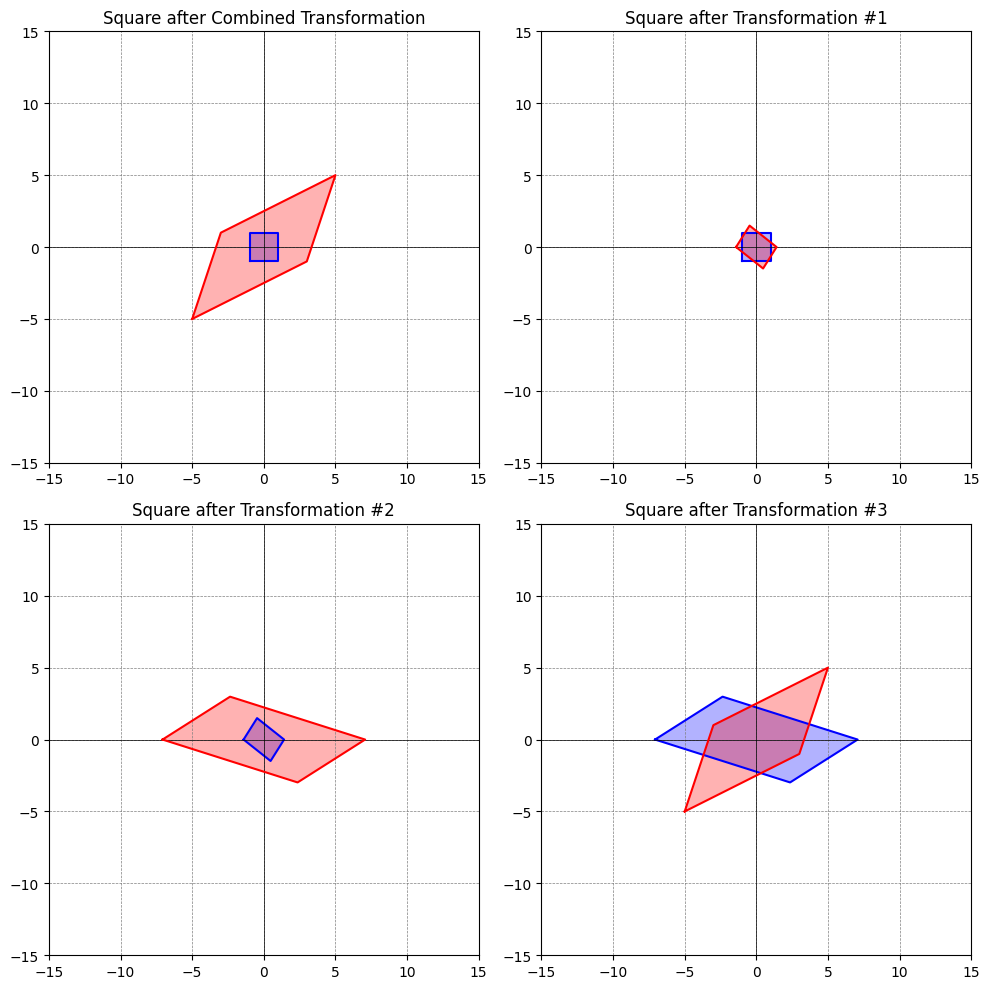

In [ ]:
# Plot initial coordinate axis and unit square
def plot_square(ax,square):
  ax.plot(square[0,:],square[1,:],'b')
  ax.fill(square[0, :], square[1, :], 'blue', alpha=0.3)
  ax.set_xlim(-15, 15)
  ax.set_ylim(-15, 15)
  ax.axhline(0, color='black',linewidth=0.5)
  ax.axvline(0, color='black',linewidth=0.5)
  ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Apply transformation and plot
def plot_transformed_square(ax, matrix, square):
    transformed_square = np.dot(matrix, square)
    ax.plot(transformed_square[0, :], transformed_square[1, :], 'r')
    ax.fill(transformed_square[0, :], transformed_square[1, :], 'red', alpha=0.3)
    return transformed_square

# Initialize unit square
square = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1]]).T

# Inputs for 3 2x2 matrices
matrix1 = np.array([[ 0.94280904, 0.47140452], [-0.74535599, 0.74535599]])  # Replace with your matrix
matrix2 = np.array([[5, 0], [0, 2]])  # Replace with your matrix
matrix3 = np.array([[ 0.70710678, -0.4472136 ],[ 0.70710678, 0.89442719]])  # Replace with your matrix
matrices = [matrix1, matrix2, matrix3]

# Calculate product of all three matrices
product_matrix = np.dot(matrix3, np.dot(matrix2, matrix1))

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot combined transformation as the first graph
plot_square(axs[0, 0], square)
square_combined = plot_transformed_square(axs[0, 0], product_matrix, square)
axs[0, 0].set_title('Square after Combined Transformation')

# Plot individual transformations as the remaining graphs
for i, (matrix, ax) in enumerate(zip(matrices, axs.flat[1:]), start=1):
    plot_square(ax, square)
    square = plot_transformed_square(ax, matrix, square)
    ax.set_title(f'Square after Transformation #{i}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

# Properties
Sum of Eigenvalues: The sum of all the eigenvalues of a matrix is equal to its trace (the sumof the diagonal elements of the matrix). This holds true regardless of whether the matrix is
square or not.
1.

Product of Eigenvalues: The product of all the eigenvalues of a matrix is equal to its
determinant. This also holds for square matrices.
2.
Eigenvectors corresponding to different eigenvalues are orthogonal: If a matrix A is
symmetric (i.e., A = A^T), the eigenvectors corresponding to distinct eigenvalues are
orthogonal to each other.
3.

Eigenvalue of a Identity Matrix: For an identity matrix, the eigenvalues are all 1, regardless
of the dimension of the matrix.
4.
Eigenvalue of a Scalar Multiple: If B is a matrix obtained by multiplying a scalar c to a matrix
A (i.e., B = cA), then the eigenvalues of B are just the eigenvalues of A each multiplied by c.
5.
Eigenvalues of a Diagonal Matrix: For a diagonal matrix, the eigenvalues are the diagonal
elements themselves.
6.
Eigenvalues of a Transposed Matrix: The eigenvalues of a matrix and its transpose are the
same.

# Why use PCA
Let’s say, we want to capture a picture of a large group of friends in a single frame. We would try and search for the best possible angle or rearrange the group so that everybody can be captured in a single frame instead of having to click multiple pictures. PCA, in a similar fashion, transforms the correlated features in the data into linearly independent (orthogonal) components so that all the important information from the data is captured while reducing its dimensionality.

PCA can be used when we want to:

Reduce the number of features but cannot identify the unimportant ones that can be ignored, and
Ensure that the features of the data are independent of one another even if the features become less interpretable
High school concepts used in PCA

Matrix decomposition… Which school going kid must have thought that the concepts of linear algebra would find such importance in machine learning!?

Well, matrix decomposition is about the factorization of a matrix into a product of matrices. It breaks down a matrix into constituent parts to make certain operations on the matrix easier to perform.

Of the many matrix decompositions, PCA uses eigendecomposition. ‘Eigen’ is a German word that means ‘own’. Here, a matrix (A) is decomposed into:

- A diagonal matrix formed from eigenvalues of matrix-A

- And a matrix formed by the eigenvectors of matrix-A

A square matrix can have one eigenvector and as many eigenvalues as the dimension of the matrix. For example, a 4x4 matrix will have 4 eigenvalues.

In [ ]:
from ast import Lambda
import numpy as np
# Define your square matrix
A = np.array([[4, 1], [2, 3]])
#perform the eigen decompostion
eigenValues , V=np.linalg.eig(A)

# Create the diagonal matrix of eigenvalues
Lambda=np.diag(eigenValues)
# Compute the inverse of V
V_inv = np.linalg.inv(V)

# Verify that A = VΛV^(-1)
A_reconstructed=np.dot(V,np.dot(Lambda,V_inv))
# Print the matrices
print("Matrix V (Eigenvectors of A as columns):")
print(V)
print("\nMatrix Λ (Diagonal matrix of Eigenvalues):")
print(Lambda)
print("\nInverse of V:")
print(V_inv)
print("\nReconstructed A (Should be close to original A):")
print(A_reconstructed)

Matrix V (Eigenvectors of A as columns):
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]

Matrix Λ (Diagonal matrix of Eigenvalues):
[[5. 0.]
 [0. 2.]]

Inverse of V:
[[ 0.94280904  0.47140452]
 [-0.74535599  0.74535599]]

Reconstructed A (Should be close to original A):
[[4. 1.]
 [2. 3.]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

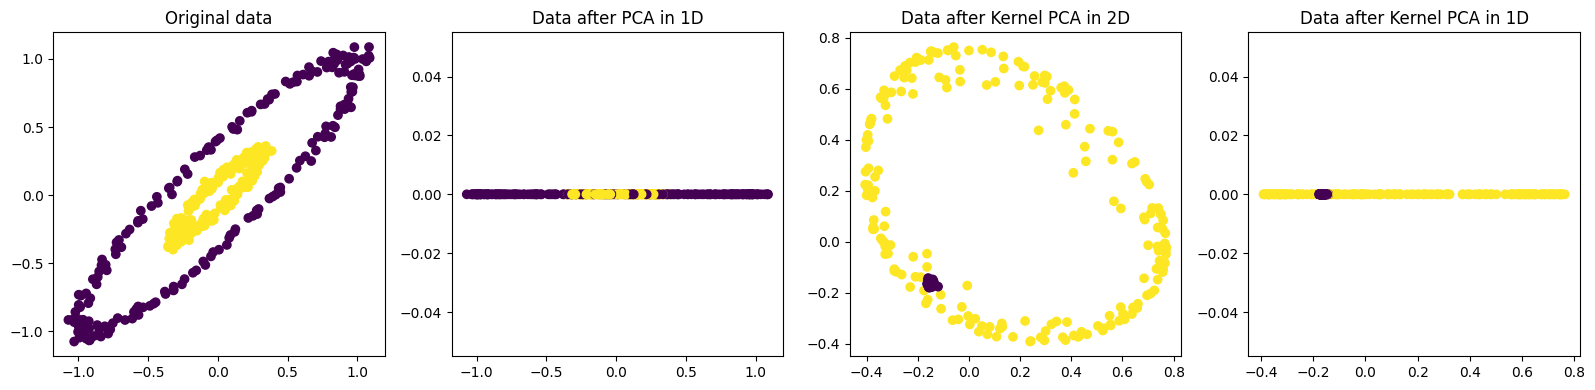

In [ ]:
#apply PCA
pca=PCA()
X_pca=pca.fit_transform(X)


# Apply Kernel PCA
kpca=KernelPCA(kernel="rbf", gamma=10)
X_kpca=kpca.fit_transform(X)

#Original data plot
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.scatter(X_pca[:,0],X[:,1],c=y)
plt.title('Original data')

# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')
# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original data')

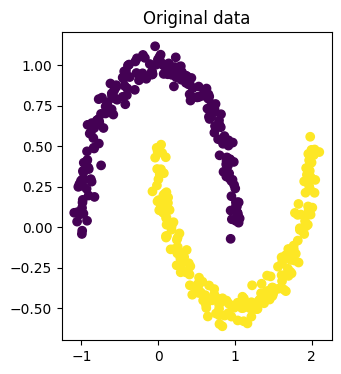

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=400, noise=.05)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)
# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

Text(0.5, 1.0, 'Data after PCA in 1D')

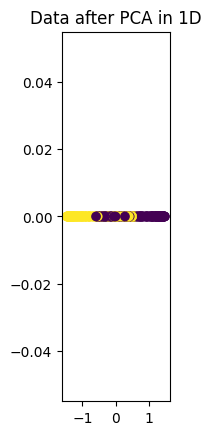

In [ ]:
# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

Text(0.5, 1.0, 'Data after Kernel PCA in 2D')

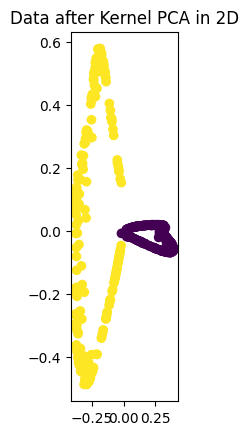

In [ ]:

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')

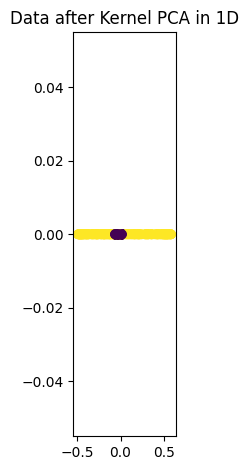

In [ ]:
# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

plt.tight_layout()
plt.show()

This code demonstrates the use of Kernel Principal Component Analysis (Kernel PCA) on a synthetic dataset of half-moon shapes. Kernel PCA is a dimensionality reduction technique that uses kernel functions to project data into a higher-dimensional space where it may become more linearly separable. The code uses the Plotly library to visualize the original data in 2D and the transformed data in 3D after applying Kernel PCA.

Here's a step-by-step explanation of the code:

Import necessary libraries:

plotly.graph_objs as go: Import the Plotly library to create interactive plots.
make_moons from sklearn.datasets: Generate a synthetic dataset of half-moon shapes.
StandardScaler from sklearn.preprocessing: Standardize the data before applying PCA.
KernelPCA from sklearn.decomposition: Perform Kernel PCA on the data.
numpy as np: Import NumPy for numerical operations.
Create synthetic data:

X, y = make_moons(n_samples=500, noise=0.02): Generate a dataset of 500 samples with some noise, forming two half-moon shapes. X contains the data, and y contains the class labels.
Standardize the data:

scaler = StandardScaler(): Create a StandardScaler object to standardize the data.
X_std = scaler.fit_transform(X): Standardize the feature vectors in X.
Apply Kernel PCA:

kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15): Create a KernelPCA object with an RBF kernel (Radial Basis Function) and specify the number of components as 3.
X_kpca = kpca.fit_transform(X_std): Apply Kernel PCA to the standardized data, reducing it to 3 principal components.
Create traces for the original data:

trace1 and trace2 are scatter plots for the two classes (Class 0 and Class 1) in 2D.
Create traces for the transformed data:

trace3 and trace4 are scatter plots for the two classes in 3D after applying Kernel PCA.
Create layouts for the plots:

layout1 is for the original data in 2D, specifying the title and axis labels.
layout2 is for the transformed data in 3D, specifying the title and axis labels for the principal components.
Create figures and plot:

fig1 contains trace1 and trace2 with layout1 for the original 2D data.
fig2 contains trace3 and trace4 with layout2 for the transformed 3D data.
fig1.show() and fig2.show() display the interactive plots using Plotly.
The code generates two plots: one showing the original data in 2D and another showing the data in 3D after Kernel PCA transformation, allowing you to visualize how the data's structure changes in a higher-dimensional space. The colors differentiate between the two classes (Class 0 and Class 1) in both plots.

In [ ]:
import plotly.graph_objs as go
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import numpy as np

# Create the half moon data
X, y = make_moons(n_samples=500, noise=0.02)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply the RBF kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_std)


# Create a trace for the original data
trace1 = go.Scatter(x=X_std[y==0, 0], y=X_std[y==0, 1],
                    mode='markers', name='Class 0',
                    marker=dict(color='red', size=5, opacity=0.5))
trace2 = go.Scatter(x=X_std[y==1, 0], y=X_std[y==1, 1],
                    mode='markers', name='Class 1',
                    marker=dict(color='blue', size=5, opacity=0.5))

# Create a trace for the transformed data
trace3 = go.Scatter3d(x=X_kpca[y==0, 0], y=X_kpca[y==0, 1], z=X_kpca[y==0, 2],
                      mode='markers', name='Class 0',
                      marker=dict(color='red', size=5, opacity=0.5))
trace4 = go.Scatter3d(x=X_kpca[y==1, 0], y=X_kpca[y==1, 1], z=X_kpca[y==1, 2],
                      mode='markers', name='Class 1',
                      marker=dict(color='blue', size=5, opacity=0.5))

# Create the layouts
layout1 = go.Layout(title='Original data in 2D', autosize=True,
                    xaxis=dict(title='Feature 1'),
                    yaxis=dict(title='Feature 2'))
layout2 = go.Layout(title='Data after RBF Kernel PCA in 3D', autosize=True,
                    scene=dict(xaxis=dict(title='PC 1'),
                               yaxis=dict(title='PC 2'),
                               zaxis=dict(title='PC 3')))

# Create the figures and plot
fig1 = go.Figure(data=[trace1, trace2], layout=layout1)
fig2 = go.Figure(data=[trace3, trace4], layout=layout2)

fig1.show()
fig2.show()

# **Kernel PCA step by step**

Kernel PCA is an extension of PCA that allows for the separability of nonlinear data by making use of kernels. The basic idea behind it is to project the linearly inseparable data onto a higher dimensional space where it becomes linearly separable.

Kernel PCA can be summarized as a 4 step process [1]:

Text(0.5, 1.0, 'Original data')

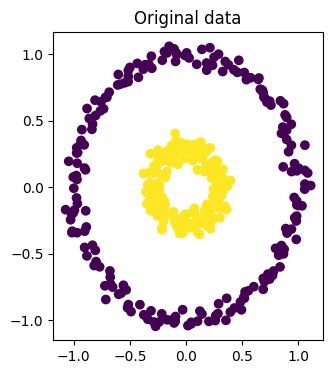

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
import numpy as np

# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

In [ ]:
X_centered = X - np.mean(X, axis=0)

Text(0.5, 1.0, 'Original data')

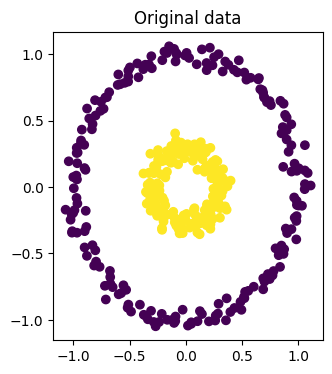

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], c=y)
plt.title('Original data')

In [ ]:
def rbf_kernel(x1, x2, gamma=0.1):
    distance = np.linalg.norm(x1 - x2) ** 2
    return np.exp(-gamma * distance)

# Create the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X_centered[i], X_centered[j])

In [ ]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(K)

In [ ]:
eigenvectors.shape

(400, 400)

In [ ]:
# Reverse the arrays as eigh returns them in ascending order
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

In [ ]:
eigenvalues.shape

(400,)

In [ ]:
k = 2
X_kpca = eigenvectors[:, :k]

In [ ]:
X_kpca.shape

(400, 2)

Text(0.5, 1.0, 'Data after Kernel PCA in 1D')

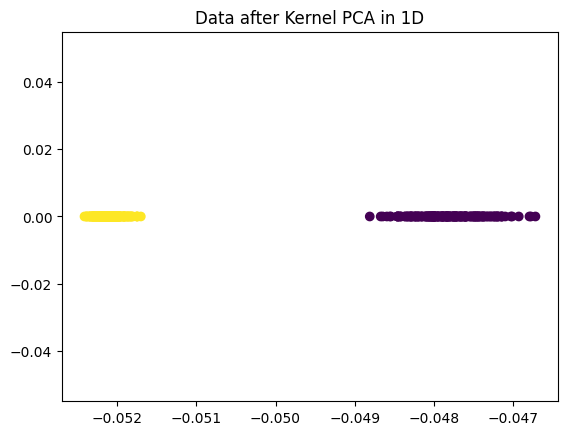

In [ ]:
plt.scatter(X_kpca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

In [ ]:
import numpy as np

# Create a 2D matrix
A = np.array([[1,2], [3,4]])

# Perform SVD
U, S, VT = np.linalg.svd(A)

# U and VT are the left and right singular vectors, while S contains the singular values.
# Note: S is a 1-D array rather than a diagonal matrix. To convert it into a diagonal matrix, you can use np.diag().

print("U:\n", U)
print("S:\n", np.diag(S))
print("VT:\n", VT)

U:
 [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S:
 [[5.4649857  0.        ]
 [0.         0.36596619]]
VT:
 [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]
